**The FinancialToolkit** is an open-source financial toolkit in which all relevant financial ratios (50+), indicators and performance measurements are written down in the most simplistic way allowing for complete transparency of the calculation method. This allows you to not have to rely on metrics from other providers and, given a financial statement, allow for efficient manual calculations. This leads to one uniform method of calculation being applied that is available and understood by everyone.

## Table of Contents

1. [Installation](#Installation)
2. [The Toolkit Module](#The-Toolkit-Module)
3. [The Ratios Module](#The-Ratios-Module)
4. [The Models Module](#The-Models-Module)

# Installation
To install the FinancialToolkit it simply requires the following:

```cli
pip install financialtoolkit -U
````

From within Python use:

```python
from financialtoolkit import Toolkit
```
 
The dependencies of the package are on purpose *very slim* so that it will work well with any combination of packages and not result in conflicts. I've also been careful with my selection in which I leave out functionality like technical analysis in which [ta-lib](https://ta-lib.org/) does an excellent job as well as portfolio attribution and optimisation in which [Riskfolio-lib](https://riskfolio-lib.readthedocs.io/en/latest/index.html) shines and lastly allow for any source to be incorporated to allow for the incorporation of data sources from [OpenBB](https://openbb.co/).

In [2]:
import pandas as pd
import numpy as np

from financialtoolkit import Toolkit

API_KEY = "9d08b12c4a88cc5e1f811a4c25a7f102"

# The Toolkit Module

Initializing only is required once. This is the case for any function so once you have obtained a balance sheet statement, it will be stored accordingly which means that requests to FinancialModelingPrep, the source used in these examples, are kept to a minimum.

In [3]:
# Initialize the Toolkit with company tickers
companies = Toolkit(["AAPL", "MSFT", "GOOGL", "AMZN"], api_key=API_KEY)

help(companies)

Help on Toolkit in module financialtoolkit.base.toolkit_controller object:

class Toolkit(builtins.object)
 |  Toolkit(tickers, api_key: str = '', historical: pandas.core.frame.DataFrame = Empty DataFrame
 |  Columns: []
 |  Index: [], balance: pandas.core.frame.DataFrame = Empty DataFrame
 |  Columns: []
 |  Index: [], income: pandas.core.frame.DataFrame = Empty DataFrame
 |  Columns: []
 |  Index: [], cash: pandas.core.frame.DataFrame = Empty DataFrame
 |  Columns: []
 |  Index: [], format_location: str = '')
 |  
 |  Toolkit Class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, tickers, api_key: str = '', historical: pandas.core.frame.DataFrame = Empty DataFrame
 |  Columns: []
 |  Index: [], balance: pandas.core.frame.DataFrame = Empty DataFrame
 |  Columns: []
 |  Index: [], income: pandas.core.frame.DataFrame = Empty DataFrame
 |  Columns: []
 |  Index: [], cash: pandas.core.frame.DataFrame = Empty DataFrame
 |  Columns: []
 |  Index: [], format_location: str = '')
 |     

Adj Close                                           Close  \
                  AAPL        AMZN       GOOGL        MSFT        AAPL   
Date                                                                     
2023-05-03  167.218704  103.650002  105.410004  304.399994  167.449997   
2023-05-04  165.560989  104.000000  104.690002  305.410004  165.789993   
2023-05-05  173.330261  105.660004  105.570000  310.649994  173.570007   
2023-05-08  173.260345  105.830002  107.769997  308.649994  173.500000   
2023-05-09  171.532745  106.620003  107.349998  307.000000  171.770004   
2023-05-10  173.320267  110.190002  111.750000  312.309998  173.559998   
2023-05-11  173.510010  112.180000  116.570000  310.109985  173.750000   
2023-05-12  172.570007  110.260002  117.510002  308.970001  172.570007   
2023-05-15  172.070007  111.199997  116.510002  309.459991  172.070007   
2023-05-16  172.070007  113.400002  119.510002  311.739990  172.070007   

                                                      High              ...  \
                  AMZN       GOOGL        MSFT        AAPL        AMZN  ...   
Date                                                                    ...   
2023-05-03  103.650002  105.410004  304.399994  170.919998  105.959999  ...   
2023-05-04  104.000000  104.690002  305.410004  167.039993  105.389999  ...   
2023-05-05  105.660004  105.570000  310.649994  174.300003  105.760002  ...   
2023-05-08  105.830002  107.769997  308.649994  173.850006  106.099998  ...   
2023-05-09  106.620003  107.349998  307.000000  173.539993  106.790001  ...   
2023-05-10  110.190002  111.750000  312.309998  174.029999  110.669998  ...   
2023-05-11  112.180000  116.570000  310.109985  174.589996  113.279999  ...   
2023-05-12  110.260002  117.510002  308.970001  174.059998  112.639999  ...   
2023-05-15  111.199997  116.510002  309.459991  173.210007  112.290001  ...   
2023-05-16  113.400002  119.510002  311.739990  173.139999  114.790001  ...   

                   Low                    Open                          \
                 GOOGL        MSFT        AAPL        AMZN       GOOGL   
Date                                                                     
2023-05-03  104.959999  304.089996  169.500000  103.739998  105.529999   
2023-05-04  103.970001  303.399994  164.889999  104.040001  105.489998   
2023-05-05  104.110001  304.269989  170.979996  104.269997  104.820000   
2023-05-08  105.160004  306.089996  172.479996  105.040001  105.180000   
2023-05-09  107.190002  306.309998  173.050003  105.480003  108.389999   
2023-05-10  107.930000  307.670013  173.020004  108.099998  107.970001   
2023-05-11  114.410004  306.260010  173.850006  111.029999  115.400002   
2023-05-12  116.110001  306.600006  173.619995  112.160004  116.680000   
2023-05-15  116.010002  307.589996  173.160004  111.150002  116.110001   
2023-05-16  116.430000  309.829987  171.990005  111.050003  116.489998   

                           Volume                                  
                  MSFT       AAPL      AMZN       GOOGL      MSFT  
Date                                                               
2023-05-03  306.619995   65136000  65051900  21795400.0  22360800  
2023-05-04  306.239990   81235400  45345500  23419500.0  22519900  
2023-05-05  305.720001  113316400  56912900  26625100.0  28181200  
2023-05-08  310.130005   55962800  49430900  26511400.0  21318600  
2023-05-09  308.000000   45326900  44089400  36360100.0  21340800  
2023-05-10  308.619995   53724500  78627600  63153400.0  30078000  
2023-05-11  310.100006   49514700  74924800  78900000.0  31680200  
2023-05-12  310.549988   45497800  49810100  41073800.0  19758100  
2023-05-15  309.100006   37266700  53011100  36266800.0  16336500  
2023-05-16  309.829987   42071100  71290700  44985700.0  26697700  

[10 rows x 24 columns]

Adj Close                                           Close              \
            AAPL        AMZN       GOOGL        MSFT        AAPL        AMZN   
Date                                                                           
2014   24.767372   15.517500   26.533001   40.439579   27.594999   15.517500   
2015   24.020947   33.794498   38.900501   49.616070   26.315001   33.794498   
2016   27.018866   37.493500   39.622501   57.097046   28.955000   37.493500   
2017   40.113373   58.473499   52.669998   80.353020   42.307499   58.473499   
2018   37.951183   75.098503   52.248001   97.062691   39.435001   75.098503   
2019   71.711739   92.391998   66.969498  152.930145   73.412498   92.391998   
2020  130.735321  162.846497   87.632004  217.977554  132.690002  162.846497   
2021  176.032745  166.716995  144.852005  332.365417  177.570007  166.716995   
2022  129.552719   84.000000   88.230003  239.220825  129.929993   84.000000   
2023  172.070007  113.400002  119.510002  311.739990  172.070007  113.400002   

                                    High              ...         Low  \
           GOOGL        MSFT        AAPL        AMZN  ...       GOOGL   
Date                                                  ...               
2014   26.533001   46.450001   28.282499   15.649000  ...   26.510000   
2015   38.900501   55.480000   26.757500   34.387501  ...   38.866001   
2016   39.622501   62.139999   29.299999   38.369999  ...   39.480999   
2017   52.669998   85.540001   42.647499   59.200001  ...   52.634998   
2018   52.248001  101.570000   39.840000   76.038002  ...   51.652000   
2019   66.969498  157.699997   73.419998   92.663002  ...   66.606499   
2020   87.632004  222.419998  134.740005  164.145996  ...   86.804497   
2021  144.852005  336.320007  179.229996  169.350006  ...  144.852005   
2022   88.230003  239.820007  129.949997   84.050003  ...   86.570000   
2023  119.510002  311.739990  173.139999  114.790001  ...  116.430000   

                        Open                                         Volume  \
            MSFT        AAPL        AMZN       GOOGL        MSFT       AAPL   
Date                                                                          
2014   46.450001   28.205000   15.577500   26.886999   46.730000  165613600   
2015   55.419998   26.752501   34.304001   39.390999   56.040001  163649200   
2016   62.029999   29.162500   38.323502   40.160500   62.959999  122345200   
2017   85.500000   42.630001   59.117500   52.774502   85.629997  103999600   
2018  100.440002   39.632500   75.540001   52.891499  101.290001  140014000   
2019  156.449997   72.482498   92.099998   66.789497  156.770004  100805600   
2020  219.679993  134.080002  163.750000   86.863503  221.699997   99116600   
2021  335.850006  178.089996  168.955994  146.050003  338.510010   64062300   
2022  236.660004  128.410004   83.120003   86.980003  238.210007   77034200   
2023  309.829987  171.990005  111.050003  116.489998  309.829987   42071100   

                                       
           AMZN       GOOGL      MSFT  
Date                                   
2014   40960000  24648000.0  21552500  
2015   74992000  32752000.0  27334100  
2016   82788000  34718000.0  25579900  
2017   53768000  23606000.0  18717400  
2018  139090000  33110000.0  33173800  
2019   50130000  19514000.0  18369400  
2020   59144000  21070000.0  20942100  
2021   47830000  18136000.0  18000800  
2022   62401200  23986300.0  21938500  
2023   71290700  44985700.0  26697700  

[10 rows x 24 columns]

<Axes: xlabel='Date'>

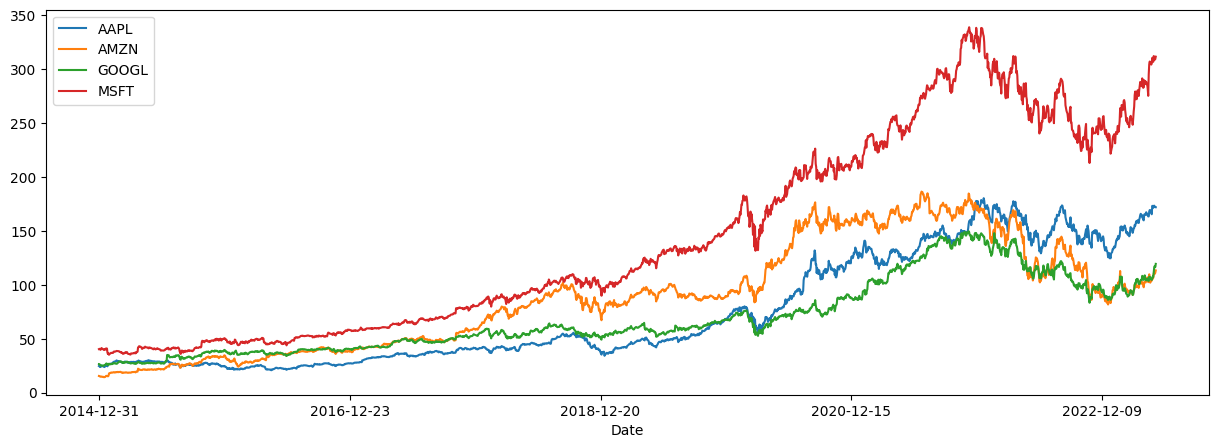

In [4]:
# Obtain daily historical data from each company
display(companies.get_historical_data(start="2000-01-01").tail(10))

# Obtain yearly historical data from each company
display(companies.get_historical_data(start="2010-01-01", period="yearly").tail(10))

# Plot the Adjusted Close Prices
companies.get_historical_data(start="2015-01-01")["Adj Close"].plot(figsize=(15, 5))

In [5]:
# Obtain the balance sheets from each company
companies.get_balance_sheet_statement()

date                                          2018          2019  \
AAPL Cash and Cash Equivalents         25913000000   48844000000   
     Short Term Investments            40388000000   51713000000   
     Cash and Short Term Investments   66301000000  100557000000   
     Accounts Receivable               48995000000   45804000000   
     Inventory                          3956000000    4106000000   
...                                            ...           ...   
AMZN Minority Interest                           0             0   
     Total Liabilities and Equity     162648000000  225248000000   
     Total Investments                           0   18929000000   
     Total Debt                        39787000000   63205000000   
     Net Debt                           8037000000   27113000000   

date                                          2020          2021          2022  
AAPL Cash and Cash Equivalents         38016000000   34940000000   23646000000  
     Short Term Investments            52927000000   27699000000   24658000000  
     Cash and Short Term Investments   90943000000   62639000000   48304000000  
     Accounts Receivable               37445000000   51506000000   60932000000  
     Inventory                          4061000000    6580000000    4946000000  
...                                            ...           ...           ...  
AMZN Minority Interest                           0             0             0  
     Total Liabilities and Equity     321195000000  420549000000  462675000000  
     Total Investments                 42274000000   59829000000   16138000000  
     Total Debt                        84389000000  116395000000  140118000000  
     Net Debt                          42267000000   80175000000   86230000000  

[172 rows x 5 columns]

In [6]:
# Obtain the income statements from each company
companies.get_income_statement()

date                                            2018          2019  \
AAPL Revenue                            265595000000  260174000000   
     Cost of Goods Sold                 163756000000  161782000000   
     Gross Profit                       101839000000   98392000000   
     Gross Profit Ratio                     0.383437      0.378178   
     Research and Development Expenses   14236000000   16217000000   
...                                              ...           ...   
AMZN Net Income Ratio                       0.043253      0.041309   
     EPS                                      1.0073          1.17   
     EPS Diluted                              1.0073          1.15   
     Weighted Average Shares              9740000000    9880000000   
     Weighted Average Shares Diluted     10000000000   10080000000   

date                                            2020          2021  \
AAPL Revenue                            274515000000  365817000000   
     Cost of Goods Sold                 169559000000  212981000000   
     Gross Profit                       104956000000  152836000000   
     Gross Profit Ratio                     0.382332      0.417794   
     Research and Development Expenses   18752000000   21914000000   
...                                              ...           ...   
AMZN Net Income Ratio                       0.055252      0.071014   
     EPS                                        2.13           3.3   
     EPS Diluted                                2.09          3.24   
     Weighted Average Shares             10000000000   10120000000   
     Weighted Average Shares Diluted     10200000000   10300000000   

date                                            2022  
AAPL Revenue                            394328000000  
     Cost of Goods Sold                 223546000000  
     Gross Profit                       170782000000  
     Gross Profit Ratio                     0.433096  
     Research and Development Expenses   26251000000  
...                                              ...  
AMZN Net Income Ratio                       -0.00529  
     EPS                                       -0.27  
     EPS Diluted                               -0.27  
     Weighted Average Shares             10189000000  
     Weighted Average Shares Diluted     10189000000  

[112 rows x 5 columns]

In [7]:
# Obtain the cash flow statements from each company
companies.get_cash_flow_statement()

date                                        2018          2019          2020  \
AAPL Net Income                      59531000000   55256000000   57411000000   
     Depreciation and Amortization   10903000000   12547000000   11056000000   
     Deferred Income Tax            -32590000000    -340000000    -215000000   
     Stock Based Compensation         5340000000    6068000000    6829000000   
     Change in Working Capital       34694000000   -3488000000    5690000000   
...                                          ...           ...           ...   
AMZN Cash End of Period              32173000000   36410000000   42377000000   
     Cash Beginning of Period        21856000000   32173000000   36410000000   
     Operating Cash Flow             30723000000   38514000000   66064000000   
     Capital Expenditure            -13427000000  -16861000000  -40140000000   
     Free Cash Flow                  17296000000   21653000000   25924000000   

date                                        2021          2022  
AAPL Net Income                      94680000000   99803000000  
     Depreciation and Amortization   11284000000   11104000000  
     Deferred Income Tax             -4774000000     895000000  
     Stock Based Compensation         7906000000    9038000000  
     Change in Working Capital       -4911000000    1200000000  
...                                          ...           ...  
AMZN Cash End of Period              36477000000   54253000000  
     Cash Beginning of Period        42377000000   36477000000  
     Operating Cash Flow             46327000000   46752000000  
     Capital Expenditure            -61053000000  -63645000000  
     Free Cash Flow                 -14726000000  -16893000000  

[120 rows x 5 columns]

With this structure, it is easy to select and plot specific companies, financial statement items and/or years. See some examples below.

date,2018,2019,2020,2021,2022
Cash and Cash Equivalents,31750000000,36092000000,42122000000,36220000000,53888000000
Short Term Investments,9500000000,18929000000,42274000000,59829000000,16138000000
Cash and Short Term Investments,41250000000,55021000000,84396000000,96049000000,70026000000
Accounts Receivable,16677000000,20816000000,24542000000,32891000000,42360000000
Inventory,17174000000,20497000000,23795000000,32640000000,34405000000


date,2018,2019,2020,2021,2022
AAPL,48995000000,45804000000,37445000000,51506000000,60932000000
MSFT,26481000000,29524000000,32011000000,38043000000,44261000000
GOOGL,21193000000,27492000000,31384000000,40270000000,40258000000
AMZN,16677000000,20816000000,24542000000,32891000000,42360000000


<Axes: >

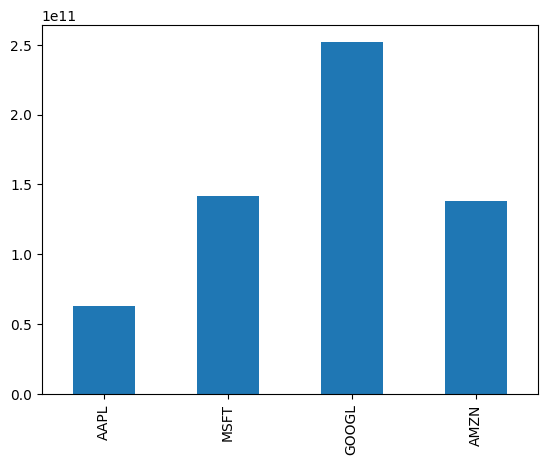

In [8]:
# Save to a variable for easier access
balance_sheet = companies.get_balance_sheet_statement()

# Show only the balance sheet statement for Amazon (purposely cut off to keep it compact)
display(balance_sheet.loc["AMZN"].head())

# Show the growth of the Accounts Receivable for each company
display(balance_sheet.loc[:, "Accounts Receivable", :])

# Plot the value of Total Shareholder Equity for each company in 2021
balance_sheet.loc[:, "Total Shareholder Equity", :][2021].plot(kind="bar")

There are several other functionalities within the `Toolkit` class which includes observing company profiles, company quotes, enterprise values and ratings. For example, after initialization you can call the functionality `get_profile`.

In [9]:
companies.get_profile()

,AAPL,MSFT,GOOGL,AMZN
symbol,AAPL,MSFT,GOOGL,AMZN
price,172.07,311.74,119.51,113.4
beta,1.296622,0.931034,1.100633,1.263194
volAvg,58437651,28986176,35166951,60196036
mktCap,2706437480581,2317939587758,1446202467812,1163529374515
lastDiv,0.96,2.72,0,0.2
range,124.17-176.15,213.43-313.7,83.34-122.43,81.43-146.57
changes,0,2.28,3,2.2
companyName,Apple Inc.,Microsoft Corporation,Alphabet Inc.,"Amazon.com, Inc."
currency,USD,USD,USD,USD


# The Ratios Module

After initialization of `Toolkit`, you can get access to the Ratios module which includes over 50 different ratios. This can be done by calling the `ratios` property.

In [10]:
ratios = companies.ratios

help(ratios)

Help on Ratios in module financialtoolkit.base.ratios_controller object:

class Ratios(builtins.object)
 |  Ratios(tickers: str | list[str], historical: pandas.core.frame.DataFrame, balance: pandas.core.frame.DataFrame, income: pandas.core.frame.DataFrame, cash: pandas.core.frame.DataFrame)
 |  
 |  Ratios Module
 |  
 |  Methods defined here:
 |  
 |  __init__(self, tickers: str | list[str], historical: pandas.core.frame.DataFrame, balance: pandas.core.frame.DataFrame, income: pandas.core.frame.DataFrame, cash: pandas.core.frame.DataFrame)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  collect_all_ratios(self, include_dividends: bool = False, diluted: bool = True, days: int = 365)
 |      Calculates all Ratios based on the data provided.
 |  
 |  collect_efficiency_ratios(self, days: int = 365)
 |      Calculates all Efficiency Ratios based on the data provided.
 |  
 |  collect_liquidity_ratios(self)
 |      Calculates all Liquidity Ratios based on th

Within this ratios module, the distinction is made between `collect_` and `get_`. The former obtains a collection of ratios (e.g. all solvency ratios) whereas the latter obtains a specific ratio.

In [11]:
ratios.collect_valuation_ratios()

date                                         2018          2019          2020  \
AAPL Earnings per Share (EPS)            2.976485      2.971447      3.275348   
     Revenue per Share (RPS)            13.279461      13.99112     15.661322   
     Price-to-Earnings (PE)             12.750335     24.133606     39.914941   
     Earnings per Share Growth                NaN     -0.001693      0.102274   
     Price-to-Earnings-Growth (PEG)      4.283689      8.121835     12.186473   
...                                           ...           ...           ...   
MSFT EV-to-EBIT                         16.710785     16.891473     23.524038   
     EV-to-EBITDA                       14.457065      14.33585     19.900717   
     EV-to-Operating-Cash-Flow          14.929809     15.010543       21.5669   
     Tangible Asset Value             47035000000   60304000000   74953000000   
     Net Current Asset Value         111174000000  106132000000  109605000000   

date                                        2021         2022  
AAPL Earnings per Share (EPS)            5.61402       6.1132  
     Revenue per Share (RPS)           21.691002    24.153643  
     Price-to-Earnings (PE)            31.355915    21.192291  
     Earnings per Share Growth          0.714023     0.088917  
     Price-to-Earnings-Growth (PEG)     5.585287     3.466644  
...                                          ...          ...  
MSFT EV-to-EBIT                        17.998229     7.935497  
     EV-to-EBITDA                      16.199773     6.957054  
     EV-to-Operating-Cash-Flow         17.226139     7.645297  
     Tangible Asset Value            92277000000  99018000000  
     Net Current Asset Value         95749000000  74602000000  

[88 rows x 5 columns]

In [12]:
ratios.get_effective_tax_rate()

date,2018,2019,2020,2021,2022
AAPL,0.183422,0.159438,0.144282,0.133023,0.162045
MSFT,0.545676,0.101813,0.165077,0.138266,0.131134
GOOGL,0.11964,0.1333,0.162493,0.162023,0.159208
AMZN,0.106296,0.169863,0.118413,0.12558,0.541947


Some of these ratios also include optional fields depending on whether there is room for different methods of calculation. E.g. whether you'd like to have the diluted average shares included in the calculation.

In [13]:
ratios.collect_solvency_ratios(diluted=False)

date                                       2018       2019        2020  \
AAPL  Debt-to-Assets Ratio              0.31303   0.319178    0.347145   
      Debt-to-Equity Ratio             1.068467   1.194048     1.72081   
      Interest Coverage Ratio         25.247222  21.386186   26.920989   
      Debt Service Coverage Ratio      0.606661   0.604722    0.628966   
      Financial Leverage               3.413301   3.741004    4.957039   
      Free Cash Flow Yield             0.085239   0.044463     0.03234   
      Net-Debt to EBITDA Ratio          1.08275   0.774128    0.962195   
      Cash Flow Coverage Ratio         0.085239   0.044463     0.03234   
      CAPEX Coverage Ratio             -5.81642  -6.611815  -11.037625   
      Dividend CAPEX Coverage Ratio   -2.865273  -2.819168   -3.771576   
AMZN  Debt-to-Assets Ratio              0.24462   0.280602    0.262734   
      Debt-to-Equity Ratio             0.913615    1.01845    0.903484   
      Interest Coverage Ratio         19.592096  23.353125   31.011536   
      Debt Service Coverage Ratio      0.181617   0.165592    0.181184   
      Financial Leverage               3.734827    3.62952    3.438771   
      Free Cash Flow Yield             0.018295   0.014331    0.011893   
      Net-Debt to EBITDA Ratio         0.289496   0.725626    0.827532   
      Cash Flow Coverage Ratio         0.018295   0.014331    0.011893   
      CAPEX Coverage Ratio            -2.288151  -2.284206    -1.64584   
      Dividend CAPEX Coverage Ratio   -2.288151  -2.284206    -1.64584   
GOOGL Debt-to-Assets Ratio             0.017234   0.053525    0.078463   
      Debt-to-Equity Ratio             0.022587   0.073311    0.112688   
      Interest Coverage Ratio        310.140351     494.06  406.822222   
      Debt Service Coverage Ratio      0.760283   0.756971     0.72534   
      Financial Leverage               1.310559    1.36967    1.436192   
      Free Cash Flow Yield             0.031435   0.033387    0.035905   
      Net-Debt to EBITDA Ratio        -0.358892  -0.075497   -0.025254   
      Cash Flow Coverage Ratio         0.031435   0.033387    0.035905   
      CAPEX Coverage Ratio             -1.90823  -2.315271   -2.922849   
      Dividend CAPEX Coverage Ratio    -1.90823  -2.315271   -2.922849   
MSFT  Debt-to-Assets Ratio             0.316046   0.273475     0.23563   
      Debt-to-Equity Ratio             0.988999   0.765816    0.600132   
      Interest Coverage Ratio         16.582144  20.342889   25.378232   
      Debt Service Coverage Ratio      0.599405   0.618827    0.732388   
      Financial Leverage               3.129283   2.800313    2.546921   
      Free Cash Flow Yield             0.055774   0.053969    0.036501   
      Net-Debt to EBITDA Ratio         1.541561   1.226368    0.873272   
      Cash Flow Coverage Ratio         0.055774   0.053969    0.036501   
      CAPEX Coverage Ratio            -3.772696  -3.747576   -3.929473   
      Dividend CAPEX Coverage Ratio   -1.803625   -1.88149    -1.98427   

date                                       2021        2022  
AAPL  Debt-to-Assets Ratio             0.355323    0.340375  
      Debt-to-Equity Ratio             1.976843    2.369533  
      Interest Coverage Ratio         45.456711   44.538042  
      Debt Service Coverage Ratio      0.868251    0.775656  
      Financial Leverage               5.563512    6.961537  
      Free Cash Flow Yield             0.031617    0.053047  
      Net-Debt to EBITDA Ratio         0.746708    0.738641  
      Cash Flow Coverage Ratio         0.031617    0.053047  
      CAPEX Coverage Ratio            -9.385476  -11.407452  
      Dividend CAPEX Coverage Ratio   -4.071619   -4.781048  
AMZN  Debt-to-Assets Ratio             0.276769    0.302843  
      Debt-to-Equity Ratio             0.841947     0.95943  
      Interest Coverage Ratio         41.048093   16.202788  
      Debt Service Coverage Ratio      0.280882   -0.022968  
      Financial Leverage           

There is also an option to show all ratios if desired. Since each `collect` function depends on the `get` functions, these will always have the same result.

In [14]:
ratios.collect_all_ratios()

date                                                     2018          2019  \
AAPL Days of Inventory Outstanding (DIO)                  NaN       9.09443   
     Days of Sales Outstanding (DSO)                      NaN     66.497104   
     Operating Cycle (CC)                                 NaN     75.591533   
     Days of Accounts Payable Outstanding (DPO)           NaN    115.202124   
     Cash Conversion Cycle (CCC)                          NaN     -39.61059   
...                                                       ...           ...   
MSFT EV-to-EBIT                                     16.710785     16.891473   
     EV-to-EBITDA                                   14.457065      14.33585   
     EV-to-Operating-Cash-Flow                      14.929809     15.010543   
     Tangible Asset Value                         47035000000   60304000000   
     Net Current Asset Value                     111174000000  106132000000   

date                                                     2020         2021  \
AAPL Days of Inventory Outstanding (DIO)             8.790318     9.118102   
     Days of Sales Outstanding (DSO)                55.344672     44.37617   
     Operating Cycle (CC)                           64.134989    53.494272   
     Days of Accounts Payable Outstanding (DPO)     95.288896    83.168299   
     Cash Conversion Cycle (CCC)                   -31.153907   -29.674027   
...                                                       ...          ...   
MSFT EV-to-EBIT                                     23.524038    17.998229   
     EV-to-EBITDA                                   19.900717    16.199773   
     EV-to-Operating-Cash-Flow                        21.5669    17.226139   
     Tangible Asset Value                         74953000000  92277000000   
     Net Current Asset Value                     109605000000  95749000000   

date                                                    2022  
AAPL Days of Inventory Outstanding (DIO)            9.409674  
     Days of Sales Outstanding (DSO)               52.037733  
     Operating Cycle (CC)                          61.447407  
     Days of Accounts Payable Outstanding (DPO)    97.050428  
     Cash Conversion Cycle (CCC)                  -35.603021  
...                                                      ...  
MSFT EV-to-EBIT                                     7.935497  
     EV-to-EBITDA                                   6.957054  
     EV-to-Operating-Cash-Flow                      7.645297  
     Tangible Asset Value                        99018000000  
     Net Current Asset Value                     74602000000  

[264 rows x 5 columns]

# The Models Module

After initialization of `Toolkit`, you can get access to the Models module which includes a variety of well-known models. This can be done by calling the `models` property.

In [15]:
models = companies.models

help(models)

Help on Models in module financialtoolkit.base.models_controller object:

class Models(builtins.object)
 |  Models(tickers: str | list[str], balance: pandas.core.frame.DataFrame, income: pandas.core.frame.DataFrame, cash: pandas.core.frame.DataFrame)
 |  
 |  Models Module
 |  
 |  Methods defined here:
 |  
 |  __init__(self, tickers: str | list[str], balance: pandas.core.frame.DataFrame, income: pandas.core.frame.DataFrame, cash: pandas.core.frame.DataFrame)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_dupont_analysis(self) -> pandas.core.frame.DataFrame
 |      Perform a Dupont analysis to breakdown the return on equity (ROE) into its components.
 |  
 |  get_extended_dupont_analyis(self) -> pandas.core.frame.DataFrame
 |      Perform am Extended Dupont analysis to breakdown the return on equity (ROE) into its components.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  

It is possible to perform an (extended) Dupont analysis for each company.

In [16]:
models.get_dupont_analysis()

TypeError: get_asset_turnover_ratio() missing 1 required positional argument: 'total_assets_end'

In [ ]:
models.get_extended_dupont_analysis()

# Calling Functions Directly

While the `Toolkit` package itself is class-based, this doesn't mean that you are unable to call each functionality individually as well. This accepts virtually any input, from `np.array` to `pd.Series` and regular `floats`.

In [ ]:
from financialtoolkit.historical import price

price.get_sharpe_ratio(
    returns=np.array([0.09, 0.6, 0.075]), risk_free_rate=np.array([0.01, 0.03, 0.03])
)

price.get_sharpe_ratio(
    returns=pd.Series([0.10, 0.5, 0.075]), risk_free_rate=pd.Series([0.005, 0.02, 0.03])
)

price.get_sharpe_ratio(returns=pd.Series([0.08, 0.3, 0.025]), risk_free_rate=0.01)

0    0.481046
1    1.992904
2    0.103081
dtype: float64

It is also relatively straight forward to group a selection of ratios into one DataFrame.

In [ ]:
from financialtoolkit.ratios import (
    efficiency,
    liquidity,
    profitability,
    solvency,
    valuation,
)

# Note: this is dummy data, not actual data

asset_turnover = efficiency.get_asset_turnover_ratio(
    sales=pd.Series([100, 110, 120, 130, 80]),
    total_assets_begin=pd.Series([500, 400, 300, 200, 100]),
    total_assets_end=pd.Series([500, 430, 320, 200, 100]),
)

quick_ratio = liquidity.get_quick_ratio(
    cash_and_equivalents=pd.Series([100, 110, 120, 130, 80]),
    accounts_receivable=pd.Series([30, 20, 30, 20, 40]),
    marketable_securities=pd.Series([30, 10, 30, 20, 40]),
    current_liabilities=pd.Series([130, 120, 110, 150, 100]),
)

return_on_assets = profitability.get_return_on_assets(
    net_income=pd.Series([80, 40, 40, 30, 20]),
    total_assets=pd.Series([200, 300, 400, 500, 450]),
)

debt_to_assets = solvency.get_debt_to_assets_ratio(
    total_debt=pd.Series([100, 110, 120, 130, 80]),
    total_assets=pd.Series([200, 140, 160, 160, 300]),
)

price_to_earnings = valuation.get_price_earnings_ratio(
    stock_price=pd.Series([30, 11, 12, 10, 30]),
    earnings_per_share=pd.Series([0.5, 0.4, 0.1, 1.1, 1.2]),
)

components = {
    "Asset Turnover": asset_turnover,
    "Quick Ratio": quick_ratio,
    "Return on Assets": return_on_assets,
    "Debt to Assets": debt_to_assets,
    "Price to Earnings": price_to_earnings,
}


pd.DataFrame(components)

,Asset Turnover,Quick Ratio,Return on Assets,Debt to Assets,Price to Earnings
0,0.200000,1.230769,0.400000,0.500000,60.000000
1,0.265060,1.166667,0.133333,0.785714,27.500000
2,0.387097,1.636364,0.100000,0.750000,120.000000
3,0.650000,1.133333,0.060000,0.812500,9.090909
4,0.800000,1.600000,0.044444,0.266667,25.000000


This returns the following table which closely resembles the proper Dupont analysis for Apple at their given reporting dates in October.

In [ ]:
from financialtoolkit.models import dupont

years = [2018, 2019, 2020, 2021, 2022]

dupont.get_dupont_analysis(
    net_income=pd.Series(
        [59531000000, 55256000000, 57411000000, 94680000000, 99803000000], index=years
    ),
    total_revenue=pd.Series(
        [265595000000, 260174000000, 274515000000, 365817000000, 394328000000],
        index=years,
    ),
    total_assets_begin=pd.Series(
        [np.nan, 365725000000, 338516000000, 323888000000, 351002000000],
        index=years,
    ),
    total_assets_end=pd.Series(
        [365725000000, 338516000000, 323888000000, 351002000000, 352755000000],
        index=years,
    )
    total_equity_begin=pd.Series(
        [np.nan, 107147000000, 90488000000, 65339000000, 63090000000], index=years
    ),
    total_equity_end=pd.Series(
        [107147000000, 90488000000, 65339000000, 63090000000, 50672000000], index=years
    ),
)

TypeError: get_asset_turnover_ratio() missing 1 required positional argument: 'total_assets_end'

In [20]:
companies.get_balance_sheet_statement().loc["AAPL", "Total Assets"]

date
2018    365725000000
2019    338516000000
2020    323888000000
2021    351002000000
2022    352755000000
Name: (AAPL, Total Assets), dtype: object